In [63]:
import os
import sqlite3
import time

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
#plt.rcParams['legend.handlelength'] = 0
from matplotlib.ticker import MultipleLocator, FuncFormatter
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
import seaborn as sns
sns.set_palette(sns.color_palette("cubehelix", 8))

In [64]:
def get_dataframes(query, databases):
    dataframes = []
    for database in databases:
        db = sqlite3.connect(database)
        dataframes += [pd.read_sql_query(query, db)]
        db.close()
    return pd.concat(dataframes)

In [65]:
query = 'select returned, submitted, tag, connected_managers, cores_per_manager, concurrent_analyses, chunksize from analyses'
databases = ['coffea.db']
analyses = get_dataframes(query, databases)
analyses['makespan'] = (analyses.returned - analyses.submitted) / 60.
analyses['cores'] = analyses.connected_managers * analyses.cores_per_manager
analyses['returned_str'] = [str(x) for x in analyses.returned]
analyses['date'] = [time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(t)) for t in analyses.returned]
analyses['concurrent analyses'] = analyses['concurrent_analyses']
analyses['cores_per_analysis'] = analyses['cores'] / analyses['concurrent_analyses']

In [66]:
analyses[['connected_managers', 'cores_per_manager', 'concurrent_analyses', 'makespan', 'cores', 'returned_str', 'date']]

,connected_managers,cores_per_manager,concurrent_analyses,makespan,cores,returned_str,date
0,9,28,2,3.836234,252,1583534016.6602905,2020-03-06 16:33:36
1,9,28,2,3.877028,252,1583534021.0089324,2020-03-06 16:33:41
2,15,28,4,4.570322,420,1583536112.455912,2020-03-06 17:08:32
3,15,28,4,4.612230,420,1583536114.9703245,2020-03-06 17:08:34
4,15,28,4,4.613526,420,1583536115.0475547,2020-03-06 17:08:35
5,15,28,4,5.427829,420,1583536195.4420018,2020-03-06 17:09:55
6,19,28,4,3.947271,532,1583538406.9240305,2020-03-06 17:46:46
7,19,28,4,4.036541,532,1583538412.280946,2020-03-06 17:46:52
8,19,28,4,4.076240,532,1583538414.6636837,2020-03-06 17:46:54
9,19,28,4,4.236475,532,1583538424.2789514,2020-03-06 17:47:04


In [67]:
for concurrent_analyses in sorted(analyses.concurrent_analyses.unique()):
    print('concurrent analyses: ', concurrent_analyses)
    analysis_cut = (analyses.concurrent_analyses == concurrent_analyses)
    for c in sorted(analyses[analysis_cut].cores.unique()):
        cores_cut = (analyses.cores == c)
        print(analyses[analysis_cut & cores_cut][['connected_managers', 'cores', 'makespan', 'returned_str']])

concurrent analyses:  1
    connected_managers  cores   makespan        returned_str
22                   1     28  14.070645  1583552916.7310038
    connected_managers  cores  makespan        returned_str
60                  10    280  3.272616  1583774358.4835477
    connected_managers  cores  makespan        returned_str
47                  50   1400  2.688214  1583722769.5099924
    connected_managers  cores  makespan        returned_str
40                 100   2800  3.038148  1583719755.9402475
concurrent analyses:  2
    connected_managers  cores   makespan        returned_str
23                   2     56  12.005020  1583554287.6950421
24                   2     56  12.007835  1583554287.8640504
   connected_managers  cores  makespan        returned_str
0                   9    252  3.836234  1583534016.6602905
1                   9    252  3.877028  1583534021.0089324
    connected_managers  cores  makespan      returned_str
58                  19    532  3.185360   1583726144

In [68]:
#ax = sns.lineplot(x="cores", y="makespan", hue="concurrent_analyses", data=analyses, err_style="bars")
managers = [('interchange', 0, True), ('0e472a65b647', 0, True), ('a5bf2de510c2', 0, True), ('25dcb92bc150', 0, True), ('9fff9ad6380c', 0, True), ('757933223207', 0, True), ('454d9db47f3b', 0, True), ('dfab5ee74ac2', 0, True), ('16a6a8d48f30', 0, True), ('9c21c87fc6e3', 0, True), ('e6b2ee2053d3', 0, True), ('e98039be97c0', 0, True), ('9b2042a36ef5', 0, True), ('baf2688dc331', 0, True), ('c21ac2ccd993', 0, True), ('d200d1d87c94', 0, True), ('762d53dea025', 0, True), ('9cfc1ec25e36', 0, True), ('e0a534818758', 0, True), ('579444df838b', 0, True), ('4bd8a3a934ab', 0, True), ('d5447d6bbdff', 0, True), ('17de136a28a2', 0, True), ('13b385cd5752', 0, True), ('2d143cfebc39', 0, True), ('92744ce32c09', 0, True), ('31893a36b41b', 0, True), ('4961006a32d5', 0, True), ('b10d124bbcdd', 0, True), ('20315d4cc114', 0, True), ('564e5c445d34', 0, True), ('addcc676b50b', 0, True), ('c7d708a3c8d1', 0, True), ('ea45f29bcfb3', 0, True), ('d8bf2417de24', 0, True), ('22d90b6644bb', 0, True), ('d83cc739e7b8', 0, True), ('dded4d0ba5a7', 0, True), ('97d3fa0cc07a', 0, True), ('da5b13b1e66b', 0, True), ('cda92ee51786', 0, True), ('623b9f40ccb4', 0, True), ('9fff6897543c', 0, True), ('854207b4aaa8', 0, True), ('cbe213284580', 0, True), ('9a567f0ed5ab', 0, True), ('19e05bb9a1ff', 0, True), ('3d4fe50da1c7', 0, True), ('a6edcf7ec564', 0, True), ('8ae2e714eba5', 0, True), ('07cffdb8222c', 0, True), ('e1f58c12a71e', 0, True), ('bb45435fa99e', 0, True), ('19b556c5ea3a', 0, True), ('d8a1deec3bb1', 0, True), ('94f638c44f0f', 0, True), ('39437ef33912', 0, True), ('e779e6475dbf', 0, True), ('6f1e0e8bc1a8', 0, True), ('c71785a145c9', 0, True), ('e638c0b2183f', 0, True), ('719d3b1e392b', 0, True), ('d14cff1f70dd', 0, True), ('c930430c90fb', 0, True), ('2a77eb635e8d', 0, True)]
len(managers) - 1

64

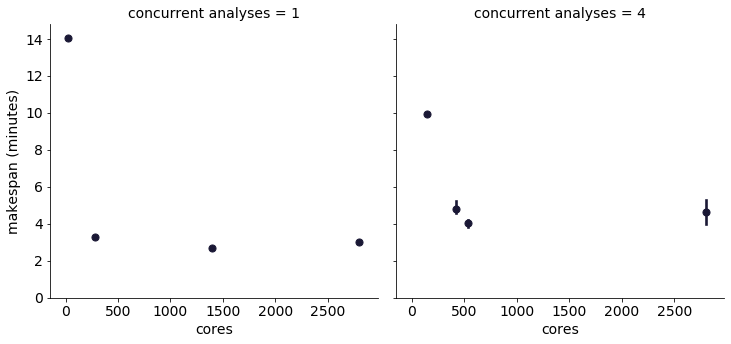

In [69]:
g = sns.lmplot("cores", "makespan", col="concurrent analyses",
           data=analyses[(analyses.concurrent_analyses == 1) | (analyses.concurrent_analyses == 4)], fit_reg=False, col_wrap=4, x_estimator=np.mean, logx=True)
g.set_axis_labels("cores", "makespan (minutes)")
g.axes[0].set_ylim(0,)
#plt.ylabel('makespan (minutes)')
plt.savefig('plots/strong_scaling.pdf', bbox_inches="tight")

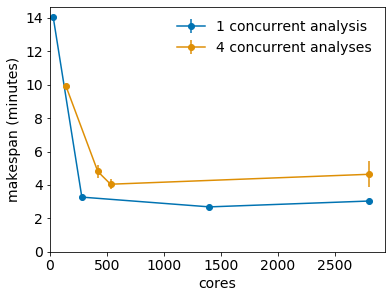

In [70]:
sns.set_palette('husl')
sns.set_palette(sns.color_palette("cubehelix", 2))
sns.set_palette('colorblind')
fig, ax = plt.subplots(figsize=(6, 4.5))

for concurrent_analyses, label in [(1, '1 concurrent analysis'), (4, '4 concurrent analyses')]:
    strong_scaling = analyses[analyses.concurrent_analyses == concurrent_analyses]
    means = strong_scaling.groupby('cores', as_index=False).mean().sort_values('cores')
    errs = strong_scaling.groupby('cores').std().sort_values('cores')
    plt.errorbar(means.cores, means.makespan, yerr=errs.makespan, marker='o', label=label)
#for x, y, yerr, ca in zip(means.cores, means.makespan, errs.makespan, means.concurrent_analyses):
#    plt.errorbar([x], [y], yerr=yerr, marker='o', markersize=8, label='{} analysts'.format(ca) if ca > 1 else '1 analyst')

ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0)
#plt.xscale('log')
#plt.axhline(y=means.makespan[0], xmin=0.05, xmax=0.95, linewidth=2, linestyle='dashed', color='black', label='ideal')

#fig.legend(frameon=False, loc=7)
#fig.subplots_adjust(right=0.7)
#plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left", frameon=False)
plt.ylabel('makespan (minutes)')
plt.xlabel('cores')
plt.legend(frameon=False)
plt.savefig('plots/strong_scaling.pdf', bbox_inches="tight")

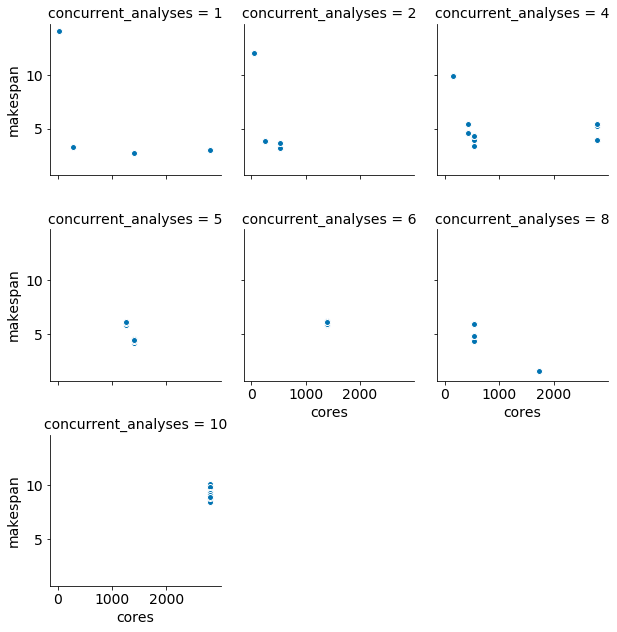

In [71]:
g = sns.FacetGrid(analyses[(analyses.concurrent_analyses <= 10)], col="concurrent_analyses",  col_wrap=3)
g = g.map(plt.scatter, "cores", "makespan", edgecolor="w")


In [72]:
weak_scaling = None
min_blocks = 1
max_blocks = 128
blocks = min_blocks
cores_per_slot = 28
cores_per_analysis = 256

for connected_managers, concurrent_analyses in [(100, 10), (45, 5), (19, 2), (10, 1)]:
    cuts = (analyses.connected_managers == connected_managers) & \
           (analyses.concurrent_analyses == concurrent_analyses)
    if weak_scaling is None:
        weak_scaling = analyses[cuts]
    else:
        weak_scaling = pd.concat([analyses[cuts], weak_scaling])

In [73]:
weak_scaling

,returned,submitted,tag,connected_managers,cores_per_manager,concurrent_analyses,chunksize,makespan,cores,returned_str,date,concurrent analyses,cores_per_analysis
60,1.583774e+09,1.583774e+09,file_stageout,10,28,1,200000,3.272616,280,1583774358.4835477,2020-03-09 12:19:18,1,280.0
58,1.583726e+09,1.583726e+09,file_stageout,19,28,2,200000,3.185360,532,1583726144.4954,2020-03-08 22:55:44,2,266.0
59,1.583726e+09,1.583726e+09,file_stageout,19,28,2,200000,3.685355,532,1583726177.81717,2020-03-08 22:56:17,2,266.0
53,1.583724e+09,1.583724e+09,file_stageout,45,28,5,200000,5.966862,1260,1583724436.5275528,2020-03-08 22:27:16,5,252.0
54,1.583724e+09,1.583724e+09,file_stageout,45,28,5,200000,5.809513,1260,1583724444.3772593,2020-03-08 22:27:24,5,252.0
55,1.583724e+09,1.583724e+09,file_stageout,45,28,5,200000,6.074757,1260,1583724449.086609,2020-03-08 22:27:29,5,252.0
56,1.583724e+09,1.583724e+09,file_stageout,45,28,5,200000,6.027417,1260,1583724453.8280659,2020-03-08 22:27:33,5,252.0
57,1.583724e+09,1.583724e+09,file_stageout,45,28,5,200000,6.071531,1260,1583724453.9857743,2020-03-08 22:27:33,5,252.0
26,1.583718e+09,1.583718e+09,file_stageout,100,28,10,200000,8.551579,2800,1583718416.5789347,2020-03-08 20:46:56,10,280.0
27,1.583718e+09,1.583718e+09,file_stageout,100,28,10,200000,10.091725,2800,1583718419.0984745,2020-03-08 20:46:59,10,280.0


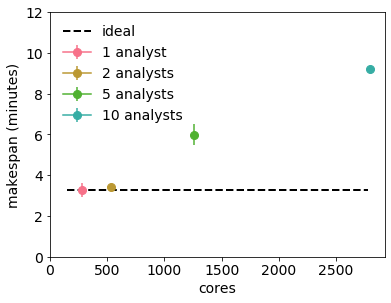

In [74]:
sns.set_palette('husl')
fig, ax = plt.subplots(figsize=(6, 4.5))
means = weak_scaling.groupby('concurrent_analyses', as_index=False).mean().sort_values('cores')
errs = weak_scaling.groupby('concurrent_analyses').std().sort_values('cores')
for x, y, yerr, ca in zip(means.cores, means.makespan, errs.makespan, means.concurrent_analyses):
    plt.errorbar([x], [y], yerr=yerr, marker='o', markersize=8, label='{} analysts'.format(ca) if ca > 1 else '1 analyst')

ax.set_ylim(ymin=0, ymax=12)
ax.set_xlim(xmin=0)
#plt.xscale('log')
plt.axhline(y=means.makespan[0], xmin=0.05, xmax=0.95, linewidth=2, linestyle='dashed', color='black', label='ideal')

#fig.legend(frameon=False, loc=7)
#fig.subplots_adjust(right=0.7)
#plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left", frameon=False)
plt.legend(frameon=False, loc="upper left")
plt.ylabel('makespan (minutes)')
plt.xlabel('cores')
#fig.set_size_inches(6, 5)
plt.savefig('plots/weak_scaling.pdf', bbox_inches="tight")

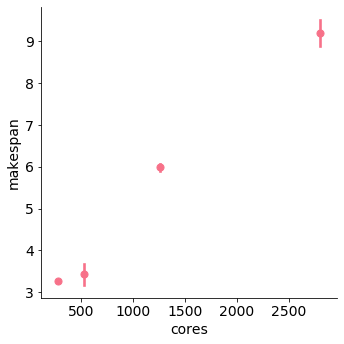

In [75]:
sns.lmplot("cores", "makespan", data=weak_scaling, fit_reg=False, x_estimator=np.mean)

In [1]:
l = [1, 2, 3]

In [3]:
s = set(l)

In [4]:
s.pop(2)

TypeError: pop() takes no arguments (1 given)

In [98]:
19 * 28

532

In [40]:
9 * 28

252

In [7]:
list(enumerate(l))

[(0, 1), (1, 3)]

In [8]:
l.pop(0)

1

In [ ]:
min_blocks = 16
max_blocks = 1025
blocks = min_blocks
cores_per_slot = 16
cores_per_analysis = 512


cores_per_manager = 28
cores = 100 * cores_per_manager
cores_per_analysis = 256
managers = int(cores / cores_per_manager)
analyses = int(cores / cores_per_analysis)
while analyses > 0:
    print(managers, cores, analyses)
    analyses = int(analyses / 2.)
    cores = analyses * cores_per_analysis
    managers = int(cores / cores_per_manager)

In [ ]:
min_blocks = 16
max_blocks = 1025
blocks = min_blocks
cores_per_slot = 16
cores_per_analysis = 128
#cores_per_analysis = 124.25

while blocks <= max_blocks:
    print(blocks, blocks * cores_per_slot, (blocks * cores_per_slot) / cores_per_analysis)
    blocks *= 2
#cores_per_analysis = 512

In [ ]:
min_blocks = 16
max_blocks = 4096
cores_per_block = 16
blocks = min_blocks
while blocks <= max_blocks:
    blocks *= 2
    print(blocks, blocks * cores_per_block)

In [44]:
min_blocks = 8
max_blocks = 150
blocks = min_blocks
cores_per_slot = 28
cores_per_analysis =280
#cores_per_analysis = 124.25

while blocks <= max_blocks:
    print(blocks, blocks * cores_per_slot, int((blocks * cores_per_slot) / cores_per_analysis))
    blocks *= 2
#cores_per_analysis = 512

8 224 0
16 448 1
32 896 3
64 1792 6
128 3584 12


In [74]:
500 / 28

17.857142857142858